In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import joblib

# Load dataset
df = pd.read_csv("Telco.csv")

# Drop customerID (not useful)
df = df.drop("customerID", axis=1)

# Replace spaces in TotalCharges with NaN and convert to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"].replace(" ", np.nan))
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

# Separate target and features
X = df.drop("Churn", axis=1)
y = df["Churn"].map({"Yes": 1, "No": 0})  # Encode target

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=["object"]).columns
numeric_cols = X.select_dtypes(exclude=["object"]).columns

# Preprocessing pipeline
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

# Full pipeline with Logistic Regression
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model.fit(X_train, y_train)

# Save model
joblib.dump(model, "churn_model.pkl")

print("✅ Model trained and saved as churn_model.pkl")


✅ Model trained and saved as churn_model.pkl


C:\Users\KSEAB\AppData\Local\Temp\ipykernel_23148\1903328107.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


In [3]:
import joblib

# Save the trained pipeline/model
joblib.dump(model, "churn_model.pkl")
print("✅ New churn_model.pkl saved successfully!")


✅ New churn_model.pkl saved successfully!


In [4]:
import joblib
import pandas as pd

# Load the trained pipeline/model
model = joblib.load("churn_model.pkl")

# Example new customer data
new_data = pd.DataFrame({
    "gender": ["Female"],
    "SeniorCitizen": [0],
    "Partner": ["Yes"],
    "Dependents": ["No"],
    "tenure": [5],
    "PhoneService": ["Yes"],
    "MultipleLines": ["No"],
    "InternetService": ["DSL"],
    "OnlineSecurity": ["No"],
    "OnlineBackup": ["Yes"],
    "DeviceProtection": ["No"],
    "TechSupport": ["No"],
    "StreamingTV": ["No"],
    "StreamingMovies": ["No"],
    "Contract": ["Month-to-month"],
    "PaperlessBilling": ["Yes"],
    "PaymentMethod": ["Electronic check"],
    "MonthlyCharges": [70.35],
    "TotalCharges": [350.5]
})  # <- make sure this closes here

# Make prediction
prediction = model.predict(new_data)
print("Churn prediction:", "Yes" if prediction[0] == 1 else "No")


Churn prediction: No


In [5]:
joblib.dump(model, "churn_model.pkl")


['churn_model.pkl']

In [1]:
import sklearn
print(sklearn.__version__)


1.5.1


In [2]:
# Load dataset
df = pd.read_csv("Telco.csv")

# Basic info
print(df.shape)

(7043, 21)


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
print(df["Churn"].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [6]:
# Missing values
print(df.isnull().sum())


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


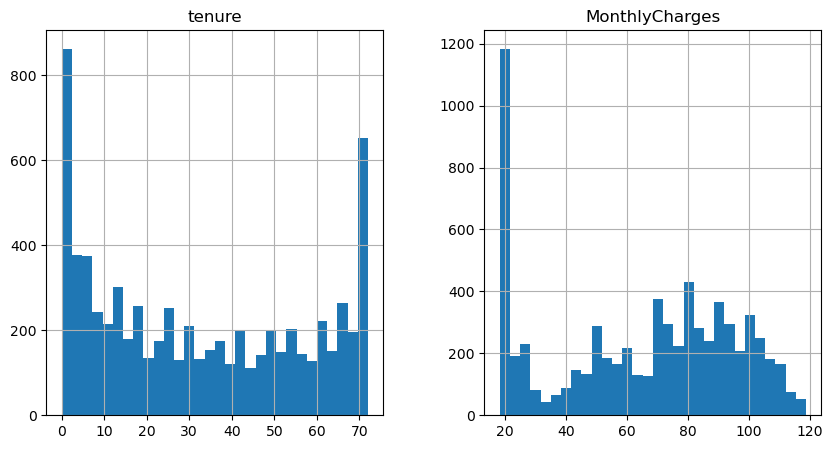

In [7]:
# Distribution of numerical features
df[["tenure", "MonthlyCharges", "TotalCharges"]].hist(bins=30, figsize=(10,5))
plt.show()

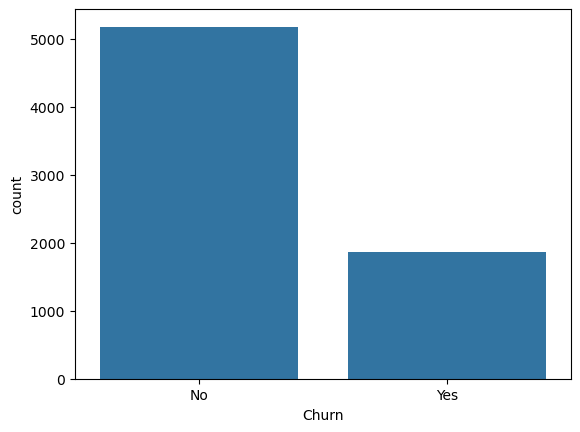

In [8]:
# Churn countplot
sns.countplot(x="Churn", data=df)
plt.show()


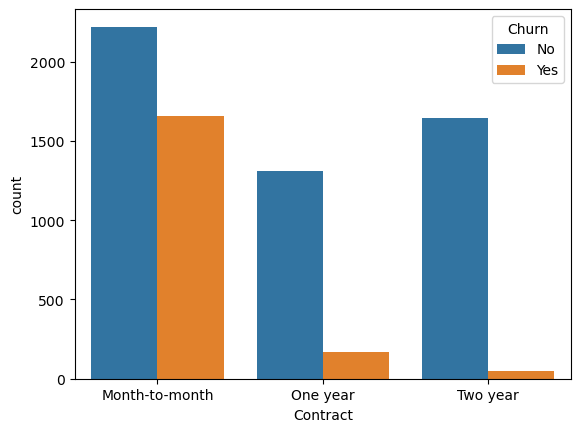

In [9]:
# Contract type vs churn
sns.countplot(x="Contract", hue="Churn", data=df)
plt.show()

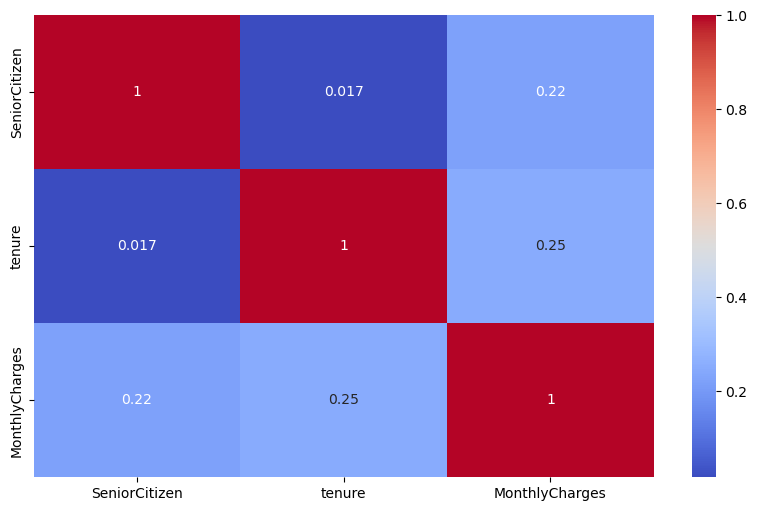

In [10]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()
